In [1]:
!pip install face_recognition
!pip install deepface
!pip install opencv-python fer
!pip install keras_preprocessing
!pip install --upgrade keras tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

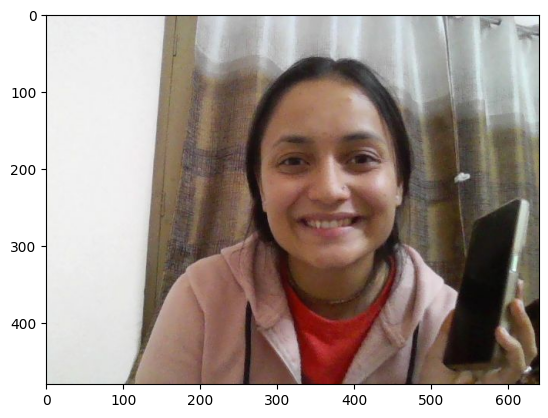

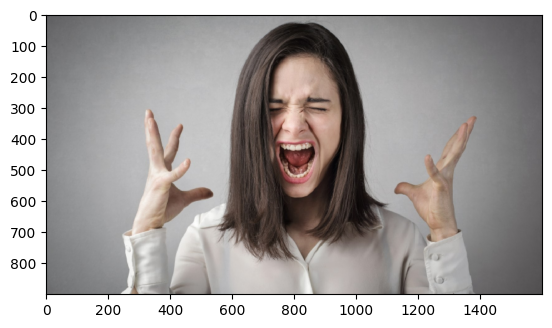

In [35]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(3000)
img1=cv2.imread("photo.jpg")
plt.imshow(img1[:,:,::-1])
plt.show()

img2=cv2.imread("/content/drive/MyDrive/Project /angry-woman-1.jpg")
plt.imshow(img2[:,:,::-1])
plt.show()

In [37]:
#analyze image
result=DeepFace.analyze(img1,actions=['emotion'])
print(result)


[{'emotion': {'angry': 5.2491722080105774e-08, 'disgust': 8.176711430607931e-13, 'fear': 4.6667905095887363e-07, 'happy': 99.996018409729, 'sad': 0.00019272399640613003, 'surprise': 4.071588399767734e-07, 'neutral': 0.003795847442233935}, 'dominant_emotion': 'happy', 'region': {'x': 251, 'y': 98, 'w': 231, 'h': 231, 'left_eye': (405, 187), 'right_eye': (320, 190)}, 'face_confidence': 0.89}]


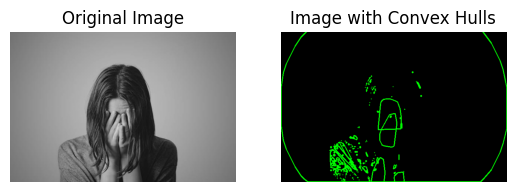

In [13]:
'''import numpy as np
from google.colab.patches import cv2_imshow
hand= cv2.imread("photo.jpg",0)
ret,threshold=cv2.threshold(hand,127,255,0,cv2.THRESH_BINARY)
contours,hierarchy=cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
hull = [cv2.convexHull(c) for < in contours]
final = np.zeros((img1.shape[0], img1.shape[1], 3), np.uint8)
plt.imshow(hand)
plt.show()'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
hand = cv2.imread("/content/drive/MyDrive/Project /woman-covers-face-in-hands.jpg", 0)

# Check if the image was loaded successfully
if hand is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Apply thresholding
    ret, threshold = cv2.threshold(hand, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find the convex hull for each contour
    hull = [cv2.convexHull(c) for c in contours]

    # Create an empty image to draw the contours and convex hulls
    final = np.zeros((hand.shape[0], hand.shape[1], 3), np.uint8)

    # Draw the convex hulls on the final image
    cv2.drawContours(final, hull, -1, (0, 255, 0), 2)

    # Convert grayscale image to BGR to display it using plt
    hand_bgr = cv2.cvtColor(hand, cv2.COLOR_GRAY2BGR)

    # Display the original image and the final image with convex hulls
    plt.subplot(1, 2, 1)
    plt.imshow(hand_bgr)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(final)
    plt.title('Image with Convex Hulls')
    plt.axis('off')

    plt.show()


In [14]:
import imutils
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display_javascript
from google.colab.output import eval_js
from base64 import b64decode
from keras.utils import to_categorical
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
TRAIN_DIR=(r"/content/drive/MyDrive/Project /face/archive (20)/images/images/train")
TEST_DIR=(r"/content/drive/MyDrive/Project /face/archive (20)/images/images/validation")
print('image loading...........')

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='grayscale',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_generator=validation_datagen.flow_from_directory(
    TEST_DIR,
    color_mode='grayscale',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

print('image loading completed')

class_labels=['Angry','Disguist','fear','happy','neutral','sad','surprise']
img,label = train_generator.__next__()



image loading...........
Found 380 images belonging to 3 classes.
Found 1240 images belonging to 7 classes.
image loading completed


In [20]:

# Adjust output layer to match the number of classes (3 instead of 7)
model = Sequential()

# CNN layers
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer adjusted for 3 classes
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 36, 36, 64)       

In [21]:

# Define input dimensions
input_height = 224
input_width = 224
channels = 3

# Create model
model = Sequential()
model.add(Flatten(input_shape=(input_height, input_width, channels)))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up data generator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Project /face/archive (20)/images/images/train',
    target_size=(input_height, input_width),
    batch_size=32,
    class_mode='categorical'
)

#Fit the model
history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs // 32,
                    epochs=epochs)


Found 380 images belonging to 3 classes.
Epoch 1/50
11/11 [==============================] - 9s 661ms/step - loss: 0.1473 - accuracy: 0.9195
Epoch 2/50
11/11 [==============================] - 8s 763ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/50
11/11 [==============================] - 7s 616ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/50
11/11 [==============================] - 9s 758ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/50
11/11 [==============================] - 7s 661ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/50
11/11 [==============================] - 7s 582ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/50
11/11 [==============================] - 9s 769ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/50
11/11 [==============================] - 7s 587ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/50
11/11 [==============================] - 7s 586ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/50
11/11 [========

In [22]:
from IPython.display import display, Javascript
from base64 import b64decode

# Rename the helper function to avoid confusion
def _take_photo_helper(filename='photo.jpg',quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            #resize
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js) # Correct indentation
    data = eval_js('takePhoto(())'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [23]:
from IPython.display import display, Javascript

def take_photo(filename='/content/drive/MyDrive/Project /angry-woman-1.jpg',quality=0.8):
    camera = cv2.VideoCapture(0)
    return_value, image = camera.read()
    if return_value:
        cv2.imwrite('angry-women-1.jpg', image)
        return 'angry-women-1.jpg'
    camera.release()
    cv2.destroyAllWindows()
    return None


In [33]:
import cv2
image_file=take_photo()


<IPython.core.display.Javascript object>

In [34]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename